In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


In [3]:
df = pd.read_csv("fff.csv")
df = df.drop(columns="Unnamed: 0")

In [4]:
df

,station_id,teplota vzduchu,vlhkost vzduchu,teplota rosneho bodu,rychlost vetra,smer vetra,teplota vozovky,grip,water,snow,...,timestamp,warning,surface_state,surface_state_error,surface_state_dry,surface_state_moist,surface_state_wet,surface_state_frosty,surface_state_snowy,surface_state_icy
0,50,8.9,68.4,3.4,3.2,149.0,10.1,0.82,0.0,0.00,...,1619993400000000000,0,1,0,1,0,0,0,0,0
1,54,8.1,66.1,2.2,3.6,307.0,10.8,0.82,0.0,0.00,...,1619993700000000000,0,1,0,1,0,0,0,0,0
2,53,6.3,62.3,-0.3,1.4,240.0,9.8,0.82,0.0,0.00,...,1619994300000000000,0,1,0,1,0,0,0,0,0
3,54,8.0,66.6,2.2,2.7,319.0,10.9,0.82,0.0,0.00,...,1619994600000000000,0,1,0,1,0,0,0,0,0
4,50,8.6,66.6,2.7,4.2,152.0,10.2,0.82,0.0,0.00,...,1619994900000000000,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91388,54,-2.4,65.0,-8.0,2.1,356.0,-2.4,0.82,0.0,0.00,...,1646091300000000000,0,1,0,1,0,0,0,0,0
91389,50,-2.3,64.7,-8.0,1.3,318.0,-1.9,0.65,0.0,0.01,...,1646091600000000000,0,1,0,1,0,0,0,0,0
91390,50,-2.4,64.7,-8.1,1.4,328.0,-1.9,0.68,0.0,0.01,...,1646091900000000000,0,1,0,1,0,0,0,0,0
91391,54,-2.3,65.7,-7.9,2.8,20.0,-2.6,0.82,0.0,0.00,...,1646092200000000000,0,1,0,1,0,0,0,0,0


<AxesSubplot:xlabel='viditelnost', ylabel='teplota vzduchu'>

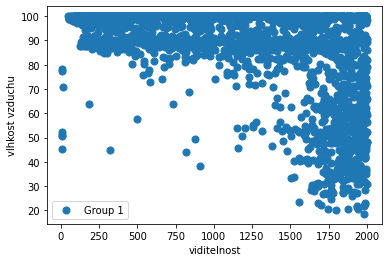

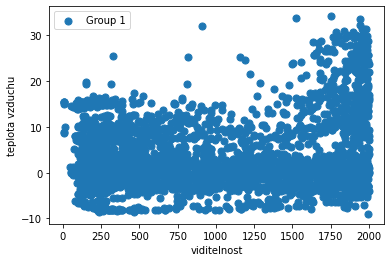

In [4]:
df = df[df['viditelnost']<2000]
# df_temp.plot.scatter(x="viditelnost", y="vlhkost vzduchu", s=50, label="Group 1")
df.plot.scatter(x="viditelnost", y="vlhkost vzduchu", s=50, label="Group 1")
df.plot.scatter(x="viditelnost", y="teplota vzduchu", s=50, label="Group 1")


/tmp/ipykernel_17055/1727397726.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_17055/1727397726.py:19: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
No artists wit

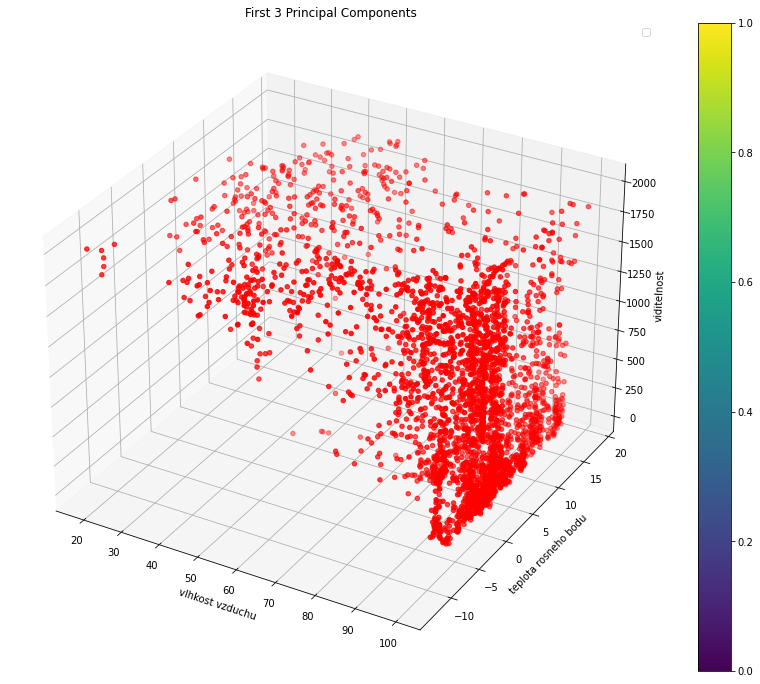

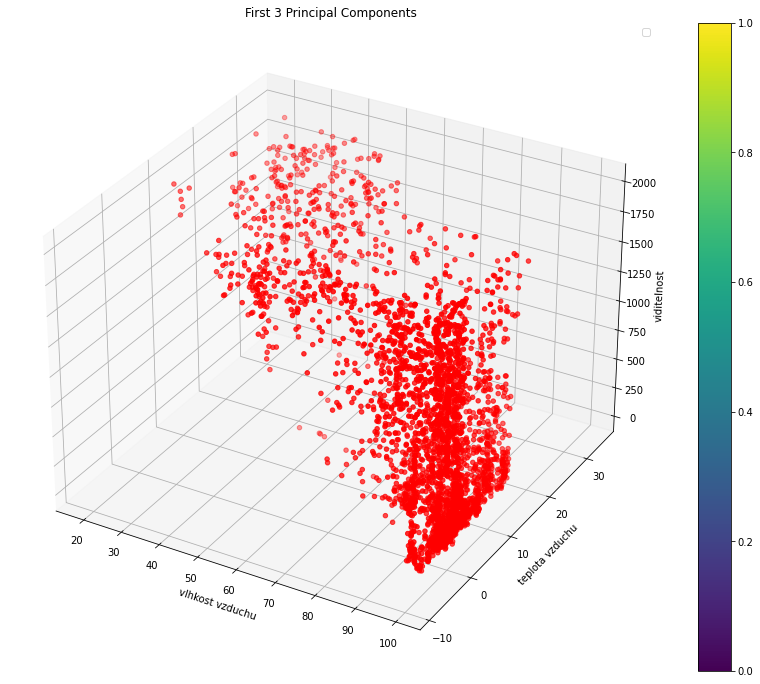

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

cb = ax.scatter(df['vlhkost vzduchu'],df['teplota rosneho bodu'],df['viditelnost'], c='red', cmap='coolwarm')

plt.title('First 3 Principal Components')
ax.set_xlabel('vlhkost vzduchu')
ax.set_ylabel('teplota rosneho bodu')
ax.set_zlabel('viditelnost')

# and here we add a colorbar
plt.colorbar(cb)

plt.legend()

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

cb = ax.scatter(df['vlhkost vzduchu'],df['teplota vzduchu'],df['viditelnost'], c='red', cmap='coolwarm')

plt.title('First 3 Principal Components')
ax.set_xlabel('vlhkost vzduchu')
ax.set_ylabel('teplota vzduchu')
ax.set_zlabel('viditelnost')

# and here we add a colorbar
plt.colorbar(cb)

plt.legend()

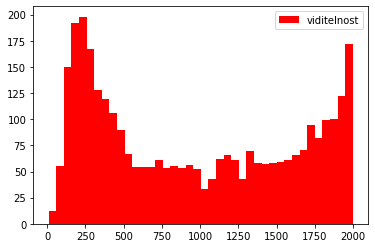

In [6]:
plt.hist([df['viditelnost']], bins = 40, color =('red'), label=("viditelnost"))
plt.legend(loc='best')



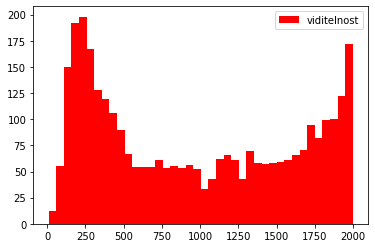

In [7]:
df_temp = df[df['viditelnost']<2000]
plt.hist([df_temp['viditelnost']], bins = 40, color =('red'), label=("viditelnost"))
plt.legend(loc='best')

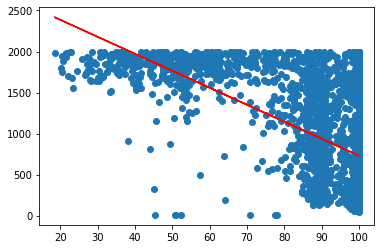

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     1617.
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          2.48e-287
Time:                        12:15:36   Log-Likelihood:                -25009.
No. Observations:                3253   AIC:                         5.002e+04
Df Residuals:                    3251   BIC:                         5.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2799.9587     46.762     59.877      0.0

In [8]:
import statsmodels.api as sma

linear_regressor = LinearRegression()  # create object for the class
X = df['vlhkost vzduchu'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df['viditelnost'].values.reshape(-1, 1)
model=linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

X = sma.add_constant(X)
ss= sma.OLS(Y,X)
sd=ss.fit()
print(sd.summary())

In [9]:

from sklearn.model_selection import cross_val_score

X = df[['teplota vzduchu']]
Y = df['teplota vozovky']

model = linear_regressor
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error',
                         cv=kfold, n_jobs=-1)
np.mean(np.absolute(scores))
# for i, (train, test) in enumerate(kfold.split(X, Y)):
#     model.fit(X.iloc[train,:], Y.iloc[train,:])
#     scores.append(model.score(X.iloc[test,:], Y.iloc[test,:]))
#     print(scores)

1.7725420479340295

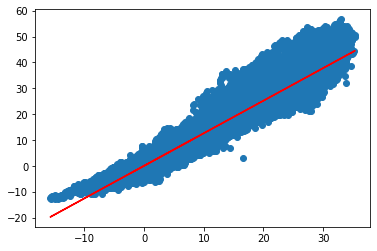